In [72]:
import matplotlib.pylab as plt
import numpy as np 
import pandas as pd 

#data source https://data.world/data-society/bank-marketing-data

url = 'https://raw.githubusercontent.com/patrykjurgielewicz/data/master/bank.csv'

df = pd.read_csv(url, sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [73]:
total = df.groupby('job')['housing'].agg(total='count').reset_index()

In [74]:
prop = df.groupby(['job', 'housing'])['housing'].agg(prop='count').reset_index()

In [79]:
merged = pd.merge(prop, total, on='job')
merged['%']= (merged.prop/merged.total)*100
merged.head()

,job,housing,prop,total,%
0,admin.,no,176,478,36.820084
1,admin.,yes,302,478,63.179916
2,blue-collar,no,251,946,26.532770
3,blue-collar,yes,695,946,73.467230
4,entrepreneur,no,74,168,44.047619


In [76]:
yes_df = merged[merged['housing']=='yes']
no_df = merged[merged['housing']=='no']

yes_value = yes_df['%'].unique()
no_value = no_df['%'].unique()

In [77]:
xlabels = total['job'].unique()
index = np.arange(len(xlabels))


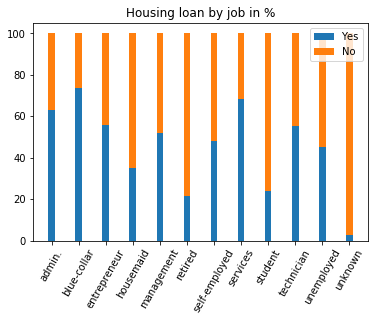

In [78]:
width = .25

p1 = plt.bar(index, yes_value, width)
p2 = plt.bar(index, no_value, width, bottom = yes_value)

plt.title("Housing loan by job in %")
plt.legend((p1[0], p2[0]), ('Yes', 'No'))

plt.xticks(index, xlabels, rotation=60)
plt.show()
